In [5]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np

# Set up SPX ticker and date range
ticker = '^GSPC'  # SPX ticker in yfinance
start_date = '2000-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

In [27]:
# Download historical data
spx = yf.download(ticker,  period='60d', interval='5m')
spx = spx.droplevel(axis=1, level=1)
spx.columns.name = None
# Calculate daily log returns
spx['log_returns'] = np.log(spx['Close'] / spx['Close'].shift(1))

# Drop NA values from first day
spx = spx.dropna()

[*********************100%***********************]  1 of 1 completed


In [24]:
spx['date'] = spx.index.date
spx['prev_date'] = spx['date'].shift(1)

hf_returns = spx[spx['date'] == spx['prev_date']]['log_returns']
# Calculate realized variance (sum of squared returns)
realized_var = hf_returns.groupby(hf_returns.index.date).apply(lambda x: np.sum(x**2))

# Calculate realized volatility (sqrt of realized variance)

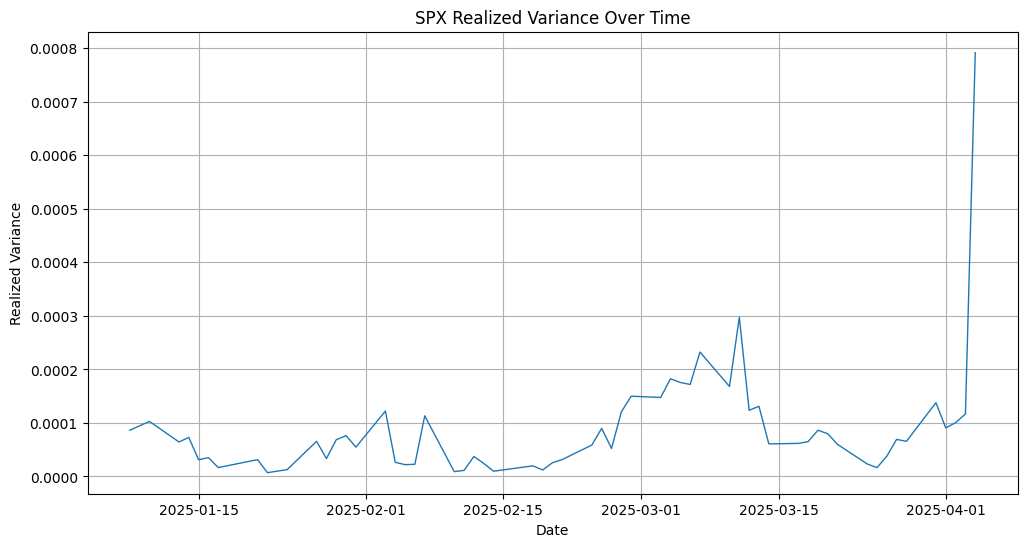

In [25]:
# Optional: Plot realized volatility over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(realized_var.index, realized_var, label='Realized Variance', linewidth=1)
plt.title('SPX Realized Variance Over Time')
plt.xlabel('Date')
plt.ylabel('Realized Variance')
plt.grid()
plt.show()